### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [ ]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

In [15]:
# Your Code goes Here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
wine.shape

(6463, 13)

In [18]:
wine = wine.dropna()

In [20]:
y= wine['type']
X = wine.iloc[:,1:]

In [21]:
X.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [22]:
y.head(1)

0    white
Name: type, dtype: object

In [23]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=104,test_size=0.20, shuffle=True)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X_train,y_train )

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9481825212683681

In [29]:
# step 1: Standardise data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
lst_accuracy = []
for i in range(1, 12):
    temp = []
    temp.append(i);
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    acc = accuracy_score(y_test, y_pred)
    print(acc)
    temp.append(acc);
    lst_accuracy.append(temp)

0.9767981438515081
0.9845320959010054
0.9814385150812065
0.9860788863109049
0.9868522815158546
0.9876256767208044
0.9907192575406032
0.9907192575406032
0.988399071925754
0.991492652745553
0.9899458623356535


In [33]:
df = pd.DataFrame(lst_accuracy)

In [34]:
df

,0,1
0,1,0.976798
1,2,0.984532
2,3,0.981439
3,4,0.986079
4,5,0.986852
5,6,0.987626
6,7,0.990719
7,8,0.990719
8,9,0.988399
9,10,0.991493


Text(0, 0.5, 'accuracy')

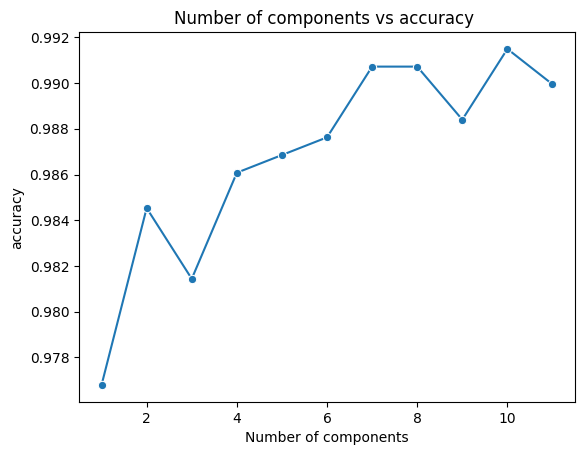

In [35]:
# plot accuracy against number of components
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot( data=df , x=df[0], y=df[1],markers=True, marker="o" )
plt.title("Number of components vs accuracy ")
plt.xlabel("Number of components")
plt.ylabel("accuracy")